### **Logistic Regression Intuition**

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
import pandas as pd

from matplotlib.patches import FancyArrowPatch

from ipywidgets import Output

### Dataset loading

In [40]:
data = pd.read_csv('data.txt', header=None)

X_train = data.iloc[:, 0:2].values
y_train = data.iloc[:, 2].values


# X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
# y_train = np.array([0, 0, 0, 1, 1, 1])

(100,)


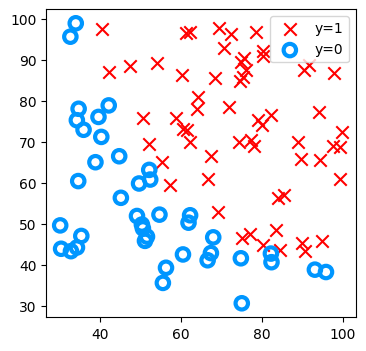

In [79]:
pos_label="y=1"
neg_label="y=0"
fig, ax = plt.subplots(1,1,figsize=(4,4))

pos = y_train == 1
neg = y_train == 0
print(pos.shape)

# Plot examples
ax.scatter(X_train[pos, 0], X_train[pos, 1], marker='x', s=80, c = 'red', label=pos_label)
ax.scatter(X_train[neg, 0], X_train[neg, 1], marker='o', s=80, label=neg_label, facecolors='none', edgecolors='#0096ff', lw=3)
ax.legend(loc='best' )

ax.figure.canvas.toolbar_visible = False
ax.figure.canvas.header_visible = False
ax.figure.canvas.footer_visible = False

/var/folders/b_/94477tyj4pv7v8vh737tmcyc0000gn/T/ipykernel_44832/2338759804.py:36: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train[row_ix, 0], X_train[row_ix, 1], cmap='Paired')


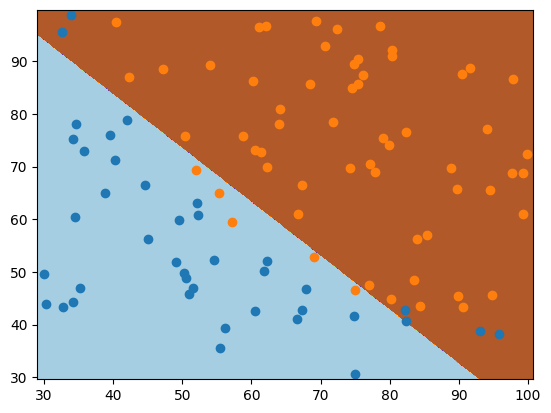

In [78]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# define bounds of the domain
min1, max1 = X_train[:, 0].min()-1, X_train[:, 0].max()+1
min2, max2 = X_train[:, 1].min()-1, X_train[:, 1].max()+1

# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# make predictions for the grid
yhat = model.predict(grid)

# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)

# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')

for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y_train == class_value)
    # create scatter of these samples
    plt.scatter(X_train[row_ix, 0], X_train[row_ix, 1], cmap='Paired')
